In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pandas import DataFrame

In [2]:
#locate and read adult census data
adult_path= "adult.csv"
adult = pd.read_csv(adult_path)

#display the data table for review
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
# Find all the data for the duplicate rows
dupes = adult[adult.duplicated()]
dupes.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


In [8]:
dupes.head(2)
#show number of rows
dupes.shape

(24, 15)

In [20]:
# List the index for each duplicated rows
list_index = adult[adult.duplicated()].index.tolist()
#list_index

In [22]:
# Create a clean DataFrame by dropping the duplicate rows 
clean_df = adult.drop(list_index)
#clean_df

In [9]:
#check number of entries
adult["age"].count()

32561

In [10]:
#check number of adults
adult["age"].nunique()

73

In [11]:
#country counts, all entries
#n_c_group = adult.groupby("native.country")
n_c_group = len(adult["native.country"].value_counts())
n_c_ct = pd.DataFrame([n_c_group], columns = ["count"])
n_c_ct

,count
0,42


In [12]:
#pull out rows for united states only / count
nc = adult.loc[adult["native.country"] == "United-States",:]
#print(nc)
us = len(nc["fnlwgt"].value_counts())
us_count = pd.DataFrame([us], columns = ["US Count"])
us_count

,US Count
0,19835


In [14]:
#education
education = adult.groupby("education")
education_df = pd.DataFrame(education["education"].count())
education_df.head()

,education
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333


In [25]:
#find then remove all "?"
garbageout = adult.drop(adult[adult["occupation"] == "?"].index)
#garbageout

In [29]:
#update the dropped df with NA in place of ?
cleaned_df = clean_df.replace(to_replace ="?", value ="NA")
#cleaned_df

In [27]:
over_50k = garbageout[garbageout["income"] == ">50K"]

In [30]:
under_50k = garbageout[garbageout["income"] == "<=50K"]

In [32]:
education_over_50k = garbageout["education.num"][garbageout["income"] == ">50K"]
education_under_50k = garbageout["education.num"][garbageout["income"] == "<=50K"]
ed1 = education_over_50k
ed2 = education_under_50k
ed1
#ed2

7        16
9        10
10       16
11       15
12       13
         ..
32536    13
32539    13
32547    12
32555    14
32558     9
Name: education.num, Length: 7650, dtype: int64

In [33]:
#education
education = adult.groupby("education")
education_df = pd.DataFrame(education["education"].count())
education_df.head()

,education
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333


In [35]:
#hours worked by gender
fhrs = garbageout["hours.per.week"][garbageout["sex"] == "Female"]
fhrs.tail()
mhrs = garbageout["hours.per.week"][garbageout["sex"] == "Male"]
mhrs
tothrs = (fhrs, mhrs)
tothrs

(1        18
 3        40
 4        40
 5        45
 7        20
          ..
 32547    20
 32548    40
 32550    40
 32557    38
 32559    40
 Name: hours.per.week, Length: 9930, dtype: int64,
 6        40
 9        60
 11       45
 13       55
 15       40
          ..
 32554    11
 32555    40
 32556    40
 32558    40
 32560    20
 Name: hours.per.week, Length: 20788, dtype: int64)

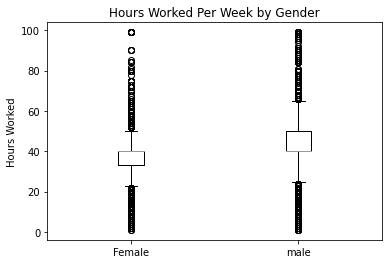

In [36]:
#box plot hours worked per week by gender
graph = [fhrs, mhrs]
labels = ["Female", "male"]
fig1, ax1 = plt.subplots()
ax1.set_title("Hours Worked Per Week by Gender")
ax1.set_ylabel("Hours Worked")
ax1.boxplot(graph, labels=labels)
plt.show()

In [37]:
#do those that earn >50K work more hours per week
hours1 = garbageout["hours.per.week"][garbageout["income"] == ">50K"]
#hours1
hours2 = garbageout["hours.per.week"][garbageout["income"] == "<=50K"]
hours2

1        18
3        40
4        40
5        45
6        40
         ..
32554    11
32556    40
32557    38
32559    40
32560    20
Name: hours.per.week, Length: 23068, dtype: int64

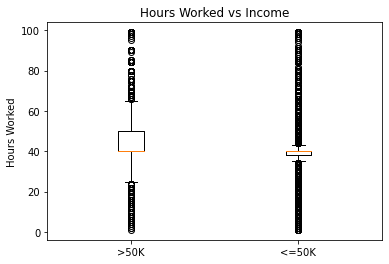

In [38]:
#box plot hours worked per week vs income
graph = [hours1, hours2]
labels = [">50K", "<=50K"]
fig1, ax1 = plt.subplots()
ax1.set_title("Hours Worked vs Income")
ax1.set_ylabel("Hours Worked")
ax1.boxplot(graph, labels=labels)
plt.show()

In [40]:
#age vs hours per week
#group age in bins of 10 years
age_bins = [0,17, 37, 58,79,89,91]
#group_names = ["<17", "17-32", "33-49", "50-65", "66-82", "83+"]
group_names = ["<17", "17-32", "33-49", "50-65", "66-81", "82,90"]
#dataframe for age and hours per week
agehrs = pd.cut(cleaned_df["age"], age_bins, labels = group_names)
#agehrs
agehrs = pd.DataFrame(agehrs)
agehrs = agehrs.rename(columns = {"age": "Age Demographic"})
agehrs 
xagehrs = agehrs.merge(cleaned_df,left_index = True, right_index = True)
xagehrs

,Age Demographic,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,"82,90",90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,66-81,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,50-65,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,33-49,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,33-49,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,17-32,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,17-32,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,33-49,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,33-49,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


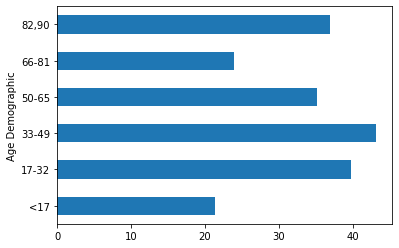

In [41]:
# barplot with age demo and hours worked
aveage = xagehrs.groupby("Age Demographic").mean()["hours.per.week"]
#aveage = xagehrs.groupby("Age Demographic").mean()["hours.per.week"]
aveage
aveage.plot.barh()

In [42]:
#private sector vs other work classes
work = xagehrs.groupby(['workclass', 'income']).count()["sex"]
bar_income= work.reset_index()
bar_income

#does private earn more

,workclass,income,sex
0,Federal-gov,<=50K,589
1,Federal-gov,>50K,371
2,Local-gov,<=50K,1476
3,Local-gov,>50K,617
4,NA,<=50K,1645
5,NA,>50K,191
6,Never-worked,<=50K,7
7,Private,<=50K,17712
8,Private,>50K,4961
9,Self-emp-inc,<=50K,494


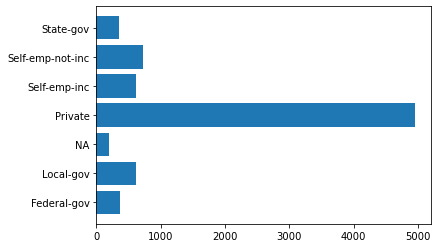

In [43]:
#bar chart >50K
high_income = bar_income[bar_income['income'] == '>50K']
plt.barh(high_income['workclass'], high_income['sex'])
plt.show()

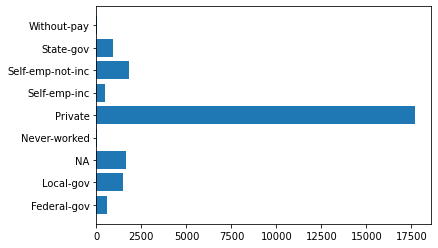

In [44]:
#bar chart <=50K
low_income = bar_income[bar_income['income'] == '<=50K']
plt.barh(low_income['workclass'], low_income['sex'])
plt.show()